# Machine Learning With Python

In [ ]:
# Data Pre-processing: Real World Dataset

# Data Pre-processing: Real World Dataset

Data Set from here: https://www.kaggle.com/c/titanic/data

We Will:
- Remove Columns
- Map columns to numerical values
- Tranform name column into new column called Title
- Impute Age, and Embarked columns
- Introduce a new column in the dataframe
- Split the data

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- From above, Cabin and Embarked columns data types would need to be changed.<br>
-It's also observed that we have a total of 891 rows

In [4]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- From above, it is observed that Age, Embarked, and Cabin have missing values.<br>
- Columns such as ticket, and passenger ID would need to be dropped because they don't contribute to producing the output variable.
- Cabin has a lot of missing values, we can drop it.

In [5]:
df_train = df_train.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

In [6]:
df_train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [7]:
df_train.Embarked.unique(), df_train.Sex.unique()

(array(['S', 'C', 'Q', nan], dtype=object),
 array(['male', 'female'], dtype=object))

- It is observed that the Embarked column has 3 unique categories, and the Sex column has two values.
- We can map these values to numerical values.

In [8]:
df_train['Sex'] = df_train['Sex'].map({'male':0, 'female':1})
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [9]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0.0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2.0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2.0


- We now have 1 column that is not in numeric form, Name.
- We can extract the titles from that Name column.

In [10]:
df_train['Title'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [11]:
df_train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2.0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0.0,Mrs
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2.0,Miss


In [12]:
df_train = df_train.drop('Name', axis=1)

# Visualizing the Title classes

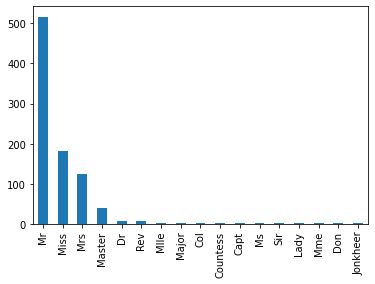

In [13]:
df_train['Title'].value_counts().plot(kind='bar')

- Some classes are rare, we can combine them into a single class called Others

In [14]:
df_train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [15]:
df_train['Title'] = df_train['Title'].replace(['Don', 'Rev', 'Dr',
       'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess',
       'Jonkheer'], 'Others')

In [16]:
df_train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others', 'Mme', 'Ms', 'Mlle'],
      dtype=object)

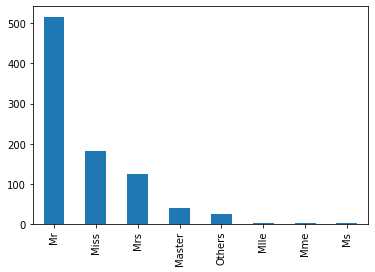

In [17]:
df_train['Title'].value_counts().plot(kind='bar')

Rewriting the other titles in the proper format

In [18]:
df_train['Title'] = df_train['Title'].replace('Ms', 'Miss')
df_train['Title'] = df_train['Title'].replace('Mme', 'Mrs')
df_train['Title'] = df_train['Title'].replace('Mlle', 'Miss')

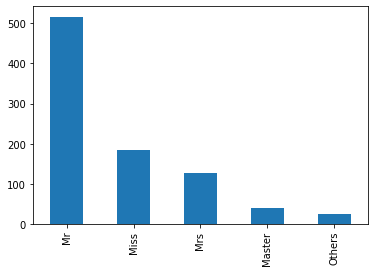

In [19]:
df_train['Title'].value_counts().plot(kind='bar')

Mapping the titles to numerical values

In [20]:
df_train['Title'] = df_train['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})

In [21]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2
1,1,1,1,38.0,1,0,71.2833,0.0,3
2,1,3,1,26.0,0,0,7.9250,2.0,1
3,1,1,1,35.0,1,0,53.1000,2.0,3
4,0,3,0,35.0,0,0,8.0500,2.0,2


In [22]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [23]:
df_train.Embarked.mode()

0    2.0
dtype: float64

In [24]:
# Imputing with the mode
df_train.Embarked = df_train.Embarked.fillna(2)

In [25]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
dtype: int64

For Age, we have a larger number of missing values and there's a bigger variation. It's imputation might be a bit tricky.
- Let's first see what other columns are useful to predict Age

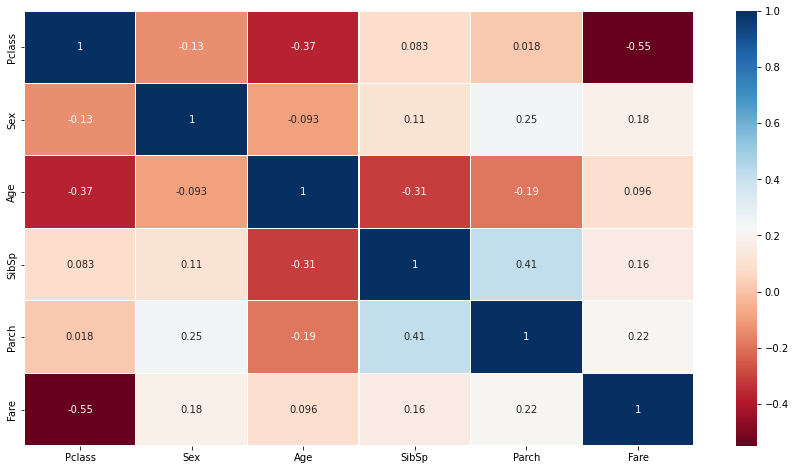

In [26]:
corr_matrix = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
plt.figure(figsize=(15,8))
sns.heatmap(data = corr_matrix, cmap='RdBu', annot=True, linewidths=0.2)

We dont have much correlated columns, so we will simply impute the Age with the mean

In [27]:
df_train.Age.mean()

29.69911764705882

In [28]:
# Imputing with the mean
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)

In [29]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [30]:
# We Add a family size column
# +1 because the person themselves is also part of the family
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,3,2
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,3,2
4,0,3,0,35.0,0,0,8.0500,2.0,2,1


Doing the same steps for the test data set

In [31]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
df_test = df_test.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)
df_test['Sex'] = df_test['Sex'].map({'male':0, 'female':1})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Title'] = df_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [33]:
df_test = df_test.drop('Name', axis=1)
df_test['Title'] = df_test['Title'].replace(['Don', 'Rev', 'Dr',
       'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess',
       'Jonkheer'], 'Others')
df_test['Title'] = df_test['Title'].replace('Ms', 'Miss')
df_test['Title'] = df_test['Title'].replace('Mme', 'Mrs')
df_test['Title'] = df_test['Title'].replace('Mlle', 'Miss')
df_test['Title'] = df_test['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})

In [39]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Title        1
dtype: int64

In [40]:
# Imputing with the mean
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)

In [45]:
# Imputing with the mean
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

In [46]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       1
dtype: int64

In [55]:
df_test['Title'].mode()

0    2.0
dtype: float64

In [59]:
# Imputing with the mode
df_test['Title'] = df_test['Title'].fillna(2)

In [60]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [63]:
# We Add a family size column
# +1 because the person themselves is also part of the family
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,3,0,34.5,0,0,7.8292,1,2.0,1
1,3,1,47.0,1,0,7.0000,2,3.0,2
2,2,0,62.0,0,0,9.6875,1,2.0,1
3,3,0,27.0,0,0,8.6625,2,2.0,1
4,3,1,22.0,1,1,12.2875,2,3.0,3


Before Splitting, it is an essential practice to shuffle the data to get a proper representation of the entire dataset

In [64]:
from sklearn.utils import shuffle

df_train = shuffle(df_train)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
274,1,3,1,29.699118,0,0,7.7500,1.0,1,1
404,0,3,1,20.000000,0,0,8.6625,2.0,1,1
775,0,3,0,18.000000,0,0,7.7500,2.0,2,1
306,1,1,1,29.699118,0,0,110.8833,0.0,1,1
521,0,3,0,22.000000,0,0,7.8958,2.0,2,1


# Splitting the data

In [65]:
X = df_train.drop('Survived', axis=1)   # all columns except Survived
y = df_train['Survived'].values    # Survived only

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

# X_train contains set of values from variable X
# y_train contains the output, whether the person survived or not for the corresponding values of X_train
# X_test contains a set of values from X, excluding the ones from X_train
# y_test contains the output, whether the person survived or not for the corresponding values of X_test

# Done with pre-processing
- We can now feed the model with data for training

In [69]:
"""from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# build the model
lr.fit(X_train,y_train)
preds = lr.predict(X_test)   # predict on the validation set

from sklearn.metrics import r2_score, accuracy_score    # percentage accuracy
r2_score(y_test, preds)
"""  

'from sklearn.linear_model import LinearRegression\nlr = LinearRegression()\n\n# build the model\nlr.fit(X_train,y_train)\npreds = lr.predict(X_test)   # predict on the validation set\n\nfrom sklearn.metrics import r2_score, accuracy_score    # percentage accuracy\nr2_score(y_test, preds)\n'

In [70]:
"""import xgboost as xgb
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train, y_train)
preds_xg = xg_reg.predict(X_test)
r2_score(y_test, preds_xg)
"""

'import xgboost as xgb\nxg_reg = xgb.XGBRegressor()\nxg_reg.fit(X_train, y_train)\npreds_xg = xg_reg.predict(X_test)\nr2_score(y_test, preds_xg)\n'

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
lg_f1 = f1_score(y_test, y_pred, average='macro')

#metrics reporting
acc = accuracy_score(y_test, y_pred)

report = classification_report(y_test,y_pred)

print('F1 score =', lg_f1)
print("Accuracy = ", acc)
print("Classification Report:\n", report)

F1 score = 0.711868861075523
Accuracy =  0.7262569832402235
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.86      0.78        99
           1       0.76      0.56      0.65        80

    accuracy                           0.73       179
   macro avg       0.74      0.71      0.71       179
weighted avg       0.73      0.73      0.72       179



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
svc = LinearSVC(class_weight='balanced')
svc.fit(X_train, y_train)
svc_preds = svc.predict(X_test)
svc_f1 = f1_score(y_test, svc_preds, average='macro')

#metrics reporting
acc = accuracy_score(y_test, svc_preds)

report = classification_report(y_test,svc_preds)

print('F1 score =', svc_f1)
print("Accuracy = ", acc)
print("Classification Report:\n", report)

F1 score = 0.7422977253095306
Accuracy =  0.7486033519553073
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        99
           1       0.75      0.66      0.70        80

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [76]:
nbc = MultinomialNB()

# Fitting data into the Naive Bayes model
nbc.fit(X_train, y_train)

# Predicting the y labels
nbc_y_pred = nbc.predict(X_test)

# F1 Score
nbc_f1 = f1_score(y_test, nbc_y_pred, average='macro')

#metrics reporting
acc = accuracy_score(y_test, nbc_y_pred)

report = classification_report(y_test,nbc_y_pred)

print('F1 score =', nbc_f1)
print("Accuracy = ", acc)
print("Classification Report:\n", report)

F1 score = 0.5738095238095238
Accuracy =  0.6201117318435754
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.86      0.71        99
           1       0.65      0.33      0.43        80

    accuracy                           0.62       179
   macro avg       0.63      0.59      0.57       179
weighted avg       0.63      0.62      0.59       179



In [77]:
rfc = RandomForestClassifier(n_estimators=50, random_state=42)

# Fitting data into the RFC model
rfc.fit(X_train, y_train)

# Predicting the y labels
rf_y_pred = rfc.predict(X_test)

#metrics reporting
# F1 Score
rf_f1 = f1_score(y_test, rf_y_pred, average='macro')
acc = accuracy_score(y_test, rf_y_pred)

report = classification_report(y_test, rf_y_pred)

print('F1 Score = ', rf_f1)
print("Accuracy = ", acc)
print("Classification Report:\n", report)

F1 Score =  0.7612945194340542
Accuracy =  0.770949720670391
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81        99
           1       0.81      0.64      0.71        80

    accuracy                           0.77       179
   macro avg       0.78      0.76      0.76       179
weighted avg       0.78      0.77      0.77       179



In [79]:
knn = KNeighborsClassifier(n_neighbors=10)

# Fitting data into the Naive Bayes model
knn.fit(X_train, y_train)

# Predicting the y labels
knn_y_pred = knn.predict(X_test)

#metrics reporting
# F1 Score
knn_f1 = f1_score(y_test, knn_y_pred, average='macro')
acc = accuracy_score(y_test, knn_y_pred)

report = classification_report(y_test, knn_y_pred)

print('F1 Score = ', knn_f1)
print("Accuracy = ", acc)
print("Classification Report:\n", report)

F1 Score =  0.6470160871821483
Accuracy =  0.6815642458100558
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.90      0.76        99
           1       0.77      0.41      0.54        80

    accuracy                           0.68       179
   macro avg       0.71      0.66      0.65       179
weighted avg       0.70      0.68      0.66       179



In [106]:
import xgboost as xgb
xg_reg = xgb.XGBClassifier(max_depth=5, n_estimators=100, random_state=42,
                           learning_rate= 0.05, )
xg_reg.fit(X_train, y_train)
preds_xg = xg_reg.predict(X_test)

#metrics reporting
xgb_f1 = f1_score(y_test, preds_xg, average='macro')
acc = accuracy_score(y_test, preds_xg)

report = classification_report(y_test, preds_xg)

print('F1 Score = ', xgb_f1)
print("Accuracy = ", acc)
print("Classification Report:\n", report)

F1 Score =  0.7865659777424483
Accuracy =  0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.94      0.84        99
           1       0.89      0.62      0.74        80

    accuracy                           0.80       179
   macro avg       0.82      0.78      0.79       179
weighted avg       0.82      0.80      0.79       179



In [110]:
submission=pd.read_csv('gender_submission.csv')
result=xg_reg.predict(df_test)
result=result.astype(int)
submission.Survived=result
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [111]:
submission.to_csv('xgc_submission.csv',index=False)